In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [2]:
import dataloader
import utils
import lstmencdec
from utils import mae, rmse

import sys
import time
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import gc

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, RepeatVector
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten, TimeDistributed

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Model Data range
date = datetime.datetime(2021,3,12)
# Total entry count
count = 1200
# Training entry count
training_count = 1000
history_size = 30

%load_ext autoreload
%autoreload 2

# Amazon

In [3]:
path = "../032721Comparison/Data/AMZN2021.csv"
# Load data
train_x, train_y, test_x, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)

(1258, 7)
(1258, 7)
(1257, 7)
(1257, 7)
(1200, 7)
(970, 30, 1)
(200, 30, 1)


In [4]:
unit_params = range(2, 60, 2)
best_config, best_err = lstmencdec.lstm_model_selection(train_x, train_y, unit_params)
print(best_config, best_err)

2 mean val RMSE: 0.01899404959524583
4 mean val RMSE: 0.0161179803780022
6 mean val RMSE: 0.017362527925732833
8 mean val RMSE: 0.01600619554390219
10 mean val RMSE: 0.01578933559655484
12 mean val RMSE: 0.017241094453903427
14 mean val RMSE: 0.013094132616499832
16 mean val RMSE: 0.013998095133231284
18 mean val RMSE: 0.013494027985372975
20 mean val RMSE: 0.013520517987562672
22 mean val RMSE: 0.012402481991395157
24 mean val RMSE: 0.014613687882470661
26 mean val RMSE: 0.012833663644513087
28 mean val RMSE: 0.013197037403004768
30 mean val RMSE: 0.01481247236525023
32 mean val RMSE: 0.014683413317955248
34 mean val RMSE: 0.013245607686417221
36 mean val RMSE: 0.01213322928796762
38 mean val RMSE: 0.01228629605129956
40 mean val RMSE: 0.012688634097863496
42 mean val RMSE: 0.013075477127075361
44 mean val RMSE: 0.013347240099027036
46 mean val RMSE: 0.012990273359701956
48 mean val RMSE: 0.014499905342320277
50 mean val RMSE: 0.011864456125652262
52 mean val RMSE: 0.0137899017100697


In [5]:
model = None
gc.collect()

unit_count = best_config

model = lstmencdec.lstm_model(test_x, unit_count)
model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)
print(model.summary())
y_hat = model.predict(test_x).transpose()[0]

del model
gc.collect()

Epoch 1/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0100
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 3.7021e-04
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 2.3633e-04
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 2.3466e-04
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 2.3140e-04
Epoch 6/100
31/31 [==============================] - 0s 6ms/step - loss: 2.3251e-04
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 2.3184e-04
Epoch 8/100
31/31 [==============================] - 0s 6ms/step - loss: 2.1342e-04
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 2.1382e-04
Epoch 10/100
31/31 [==============================] - 0s 6ms/step - loss: 1.9668e-04
Epoch 11/100
31/31 [==============================] - 0s 6ms/step - loss: 2.1340e-04
Epoch 12/100
31/31 [==============================] - 0s 6ms/step - loss: 2.0

31/31 [==============================] - 0s 14ms/step - loss: 1.3260e-04
Epoch 98/100
31/31 [==============================] - 0s 14ms/step - loss: 1.3593e-04
Epoch 99/100
31/31 [==============================] - 0s 14ms/step - loss: 1.1718e-04
Epoch 100/100
31/31 [==============================] - 0s 14ms/step - loss: 1.1372e-04
Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_290 (LSTM)              (None, 50)                10400     
_________________________________________________________________
repeat_vector_145 (RepeatVec (None, 30, 50)            0         
_________________________________________________________________
lstm_291 (LSTM)              (None, 30, 50)            20200     
_________________________________________________________________
flatten_145 (Flatten)        (None, 1500)              0         
__________________________________________________

39010

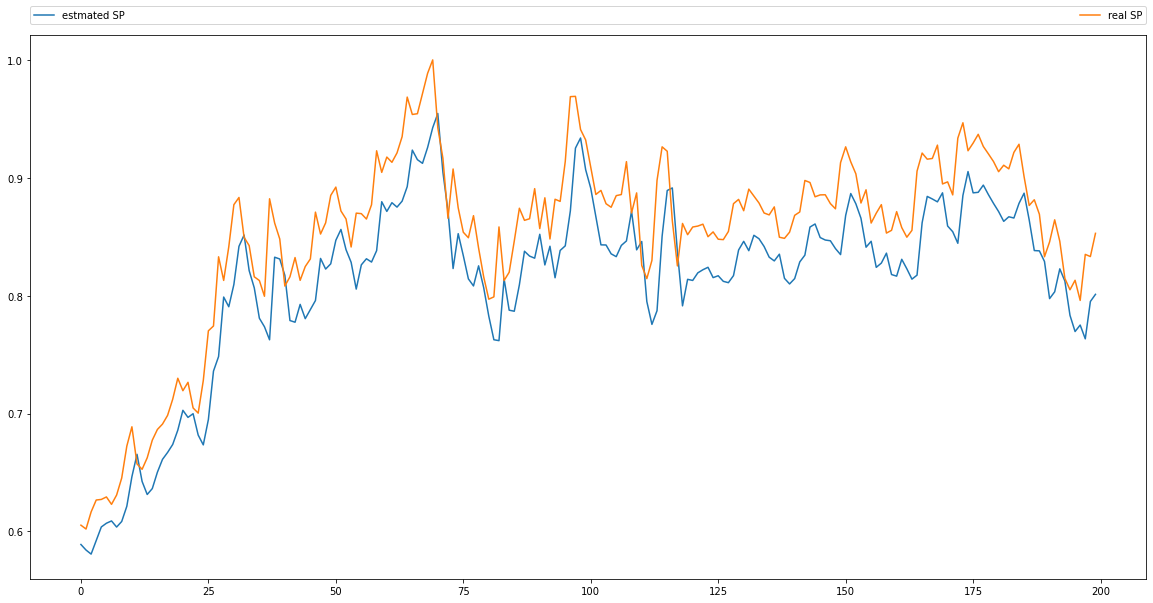

In [6]:
plt.plot(y_hat[:], label="estmated SP")
plt.plot(test_y[:], label="real SP")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [7]:
print("MAE:  ", mae(y_hat, test_y))
print("RMSE: ", rmse(y_hat, test_y))

MAE:   0.038443753343185415
RMSE:  0.04400283268971713


# SONY

In [8]:
path = "../032721Comparison/Data/SONY2021.csv"
# Load data
train_x, train_y, test_x, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)

(1258, 7)
(1258, 7)
(1257, 7)
(1257, 7)
(1200, 7)
(970, 30, 1)
(200, 30, 1)


In [9]:
unit_params = range(2, 60, 2)
best_config, best_err = lstmencdec.lstm_model_selection(train_x, train_y, unit_params)
print(best_config, best_err)

2 mean val RMSE: 0.014972894265408432
4 mean val RMSE: 0.01420119847435159
6 mean val RMSE: 0.01673706836913127
8 mean val RMSE: 0.012581280559583057
10 mean val RMSE: 0.013294811719834288
12 mean val RMSE: 0.014724535046088245
14 mean val RMSE: 0.012237957298676043
16 mean val RMSE: 0.01273092525729382
18 mean val RMSE: 0.01323756508646611
20 mean val RMSE: 0.01255864977254383
22 mean val RMSE: 0.01510898410402991
24 mean val RMSE: 0.01290633873323332
26 mean val RMSE: 0.014028257850007973
28 mean val RMSE: 0.013311118199806035
30 mean val RMSE: 0.013614848484388695
32 mean val RMSE: 0.013769819349364384
34 mean val RMSE: 0.0116965982525593
36 mean val RMSE: 0.012414757917759374
38 mean val RMSE: 0.01312333055998506
40 mean val RMSE: 0.014901591056784078
42 mean val RMSE: 0.01336517705412335
44 mean val RMSE: 0.012908807614758211
46 mean val RMSE: 0.016249815549144377
48 mean val RMSE: 0.011213613475686609
50 mean val RMSE: 0.015461782684214201
52 mean val RMSE: 0.011678670018789358
5

In [10]:
model = None
gc.collect()

unit_count = best_config

model = lstmencdec.lstm_model(test_x, unit_count)
model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)
print(model.summary())
y_hat = model.predict(test_x).transpose()[0]

del model
gc.collect()

Epoch 1/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 3.1763e-04
Epoch 3/100
31/31 [==============================] - 0s 7ms/step - loss: 2.0320e-04
Epoch 4/100
31/31 [==============================] - 0s 7ms/step - loss: 2.0028e-04
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 2.1284e-04
Epoch 6/100
31/31 [==============================] - 0s 7ms/step - loss: 1.8999e-04
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 1.9403e-04
Epoch 8/100
31/31 [==============================] - 0s 7ms/step - loss: 1.8729e-04
Epoch 9/100
31/31 [==============================] - 0s 8ms/step - loss: 1.7949e-04
Epoch 10/100
31/31 [==============================] - 0s 8ms/step - loss: 1.8513e-04
Epoch 11/100
31/31 [==============================] - 0s 8ms/step - loss: 1.8371e-04
Epoch 12/100
31/31 [==============================] - 0s 8ms/step - loss: 1.67

31/31 [==============================] - 0s 7ms/step - loss: 1.1231e-04
Epoch 98/100
31/31 [==============================] - 0s 7ms/step - loss: 1.1826e-04
Epoch 99/100
31/31 [==============================] - 0s 7ms/step - loss: 1.2148e-04
Epoch 100/100
31/31 [==============================] - 0s 7ms/step - loss: 1.0998e-04
Model: "sequential_291"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_582 (LSTM)              (None, 56)                12992     
_________________________________________________________________
repeat_vector_291 (RepeatVec (None, 30, 56)            0         
_________________________________________________________________
lstm_583 (LSTM)              (None, 30, 56)            25312     
_________________________________________________________________
flatten_291 (Flatten)        (None, 1680)              0         
______________________________________________________

39010

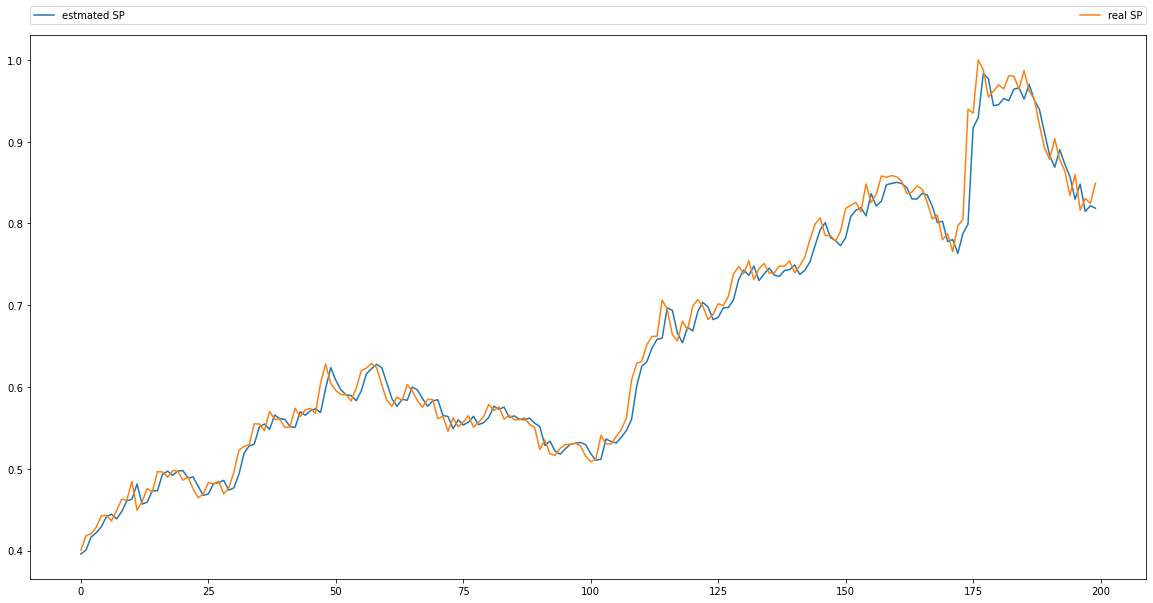

In [11]:
plt.plot(y_hat[:], label="estmated SP")
plt.plot(test_y[:], label="real SP")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [12]:
print("MAE:  ", mae(y_hat, test_y))
print("RMSE: ", rmse(y_hat, test_y))

MAE:   0.013503011346838362
RMSE:  0.019445966974861305


# IBIO

In [13]:
path = "../032721Comparison/Data/IBIO2021.csv"
# Load data
train_x, train_y, test_x, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)

(1258, 7)
(1258, 7)
(1257, 7)
(1257, 7)
(1200, 7)
(970, 30, 1)
(200, 30, 1)


In [14]:
unit_params = range(2, 60, 2)
best_config, best_err = lstmencdec.lstm_model_selection(train_x, train_y, unit_params)
print(best_config, best_err)

2 mean val RMSE: 0.02501793880459181
4 mean val RMSE: 0.026396448841087945
6 mean val RMSE: 0.023577293211268172
8 mean val RMSE: 0.022384976440843314
10 mean val RMSE: 0.02170413592297065
12 mean val RMSE: 0.02615044765409082
14 mean val RMSE: 0.02438682670042381
16 mean val RMSE: 0.023135435478006144
18 mean val RMSE: 0.021327427750809917
20 mean val RMSE: 0.022330213118824466
22 mean val RMSE: 0.020345493736130593
24 mean val RMSE: 0.021621279212299303
26 mean val RMSE: 0.02060108468765496
28 mean val RMSE: 0.02449843255431164
30 mean val RMSE: 0.02151319298630863
32 mean val RMSE: 0.023996852872656824
34 mean val RMSE: 0.02071683904269909
36 mean val RMSE: 0.0243248842841673
38 mean val RMSE: 0.021489453924520167
40 mean val RMSE: 0.021485505955713104
42 mean val RMSE: 0.021983470299626242
44 mean val RMSE: 0.01934168768027658
46 mean val RMSE: 0.02098234489118885
48 mean val RMSE: 0.020115542731115547
50 mean val RMSE: 0.021251476828096305
52 mean val RMSE: 0.019710344209613304
54

In [15]:
model = None
gc.collect()

unit_count = best_config

model = lstmencdec.lstm_model(test_x, unit_count)
model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)
print(model.summary())
y_hat = model.predict(test_x).transpose()[0]

del model
gc.collect()

Epoch 1/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 7.0892e-04
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 6.5683e-04
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 6.5315e-04
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 6.4499e-04
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 5.9130e-04
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 5.8935e-04
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 5.9325e-04
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 6.0581e-04
Epoch 11/100
31/31 [==============================] - 0s 5ms/step - loss: 7.8565e-04
Epoch 12/100
31/31 [==============================] - 0s 5ms/step - loss: 5.8382e-

31/31 [==============================] - 0s 5ms/step - loss: 4.2673e-04
Epoch 98/100
31/31 [==============================] - 0s 5ms/step - loss: 4.4254e-04
Epoch 99/100
31/31 [==============================] - 0s 5ms/step - loss: 4.0438e-04
Epoch 100/100
31/31 [==============================] - 0s 5ms/step - loss: 4.1104e-04
Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_874 (LSTM)              (None, 44)                8096      
_________________________________________________________________
repeat_vector_437 (RepeatVec (None, 30, 44)            0         
_________________________________________________________________
lstm_875 (LSTM)              (None, 30, 44)            15664     
_________________________________________________________________
flatten_437 (Flatten)        (None, 1320)              0         
______________________________________________________

39010

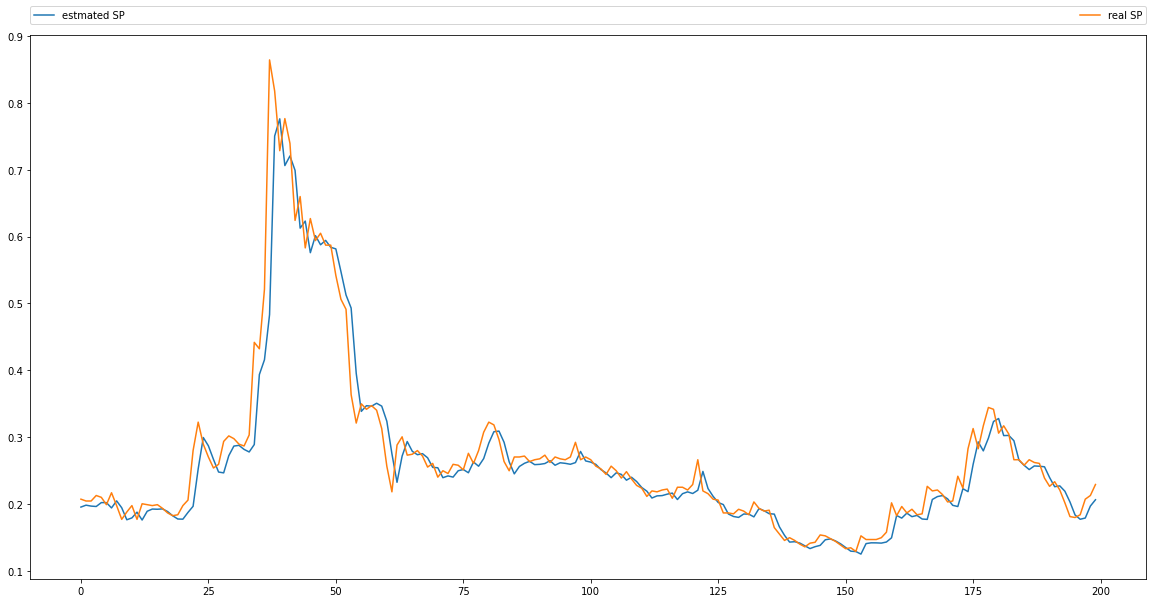

In [16]:
plt.plot(y_hat[:], label="estmated SP")
plt.plot(test_y[:], label="real SP")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [17]:
print("MAE:  ", mae(y_hat, test_y))
print("RMSE: ", rmse(y_hat, test_y))

MAE:   0.019504211063257868
RMSE:  0.03908536356923764
